In [1]:
'''각종 라이브러리 import'''
# 인공지능 라이브러리
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
# 파이썬 라이브러리
import os
import time
# 이미지 관련 라이브러리
import glob
from PIL import Image
# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt

In [8]:
# 데이터 불러오기

# 이미지 및 학습 데이터 배열의 크기 정하기
weight = 128
height = 128

normal_image = glob.glob(r"D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\*thumb.png")

# 일반 데이터를 저장할 배열 생성
nor_len = 800 #len(os.listdir(r"D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\ "))
normal_input = np.zeros((nor_len,height,weight,1), dtype="float32")
normal_target = np.zeros((nor_len), dtype="uint8")

# 이미지를 불러온 후, 28*28로 조정
cnt = 0
print("일반 파일 처리중")
for i in normal_image:
    print(cnt,"번째 처리중: ",i)
    im = Image.open(i).convert("L")
    out = im.resize((height,weight))
    normal_input[cnt,:,:,0] = out
    normal_target[cnt] = 0 # normal = 0
    cnt = cnt + 1

# 악성코드 데이터 불러오기
malware_image = glob.glob(r"D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\new_malware\*thumb.png")

# 악성코드 데이터를 저장할 배열 생성
mal_len = 1000 #len(os.listdir(r'D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\malware\ ')) # 샘플의 갯수
malware_input = np.zeros((mal_len,height,weight,1), dtype="float32")
malware_target = np.zeros((mal_len), dtype="uint8")

# 이미지를 불러온 후, 28*28로 조정
cnt = 0
print("악성 파일 처리중")
for i in malware_image:
    print(cnt,"번째 처리중: ",i)
    im = Image.open(i).convert("L")
    out = im.resize((height,weight))
    malware_input[cnt,:,:,0] = out
    malware_target[cnt] = 1 # malware = 1
    cnt = cnt + 1

# 데이터 합치기
#input_data = malware_input
#target_data = malware_target
input_data = np.concatenate((normal_input, malware_input), axis=0) / 255
target_data = np.concatenate((normal_target, malware_target), axis=0)

# 테스트셋 분리하기
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, test_size=0.2)

일반 파일 처리중
0 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\003dff5549df32bfedf244466fc38083b5f5a77d3d1f0e4a07f72db55a0ddb1a_thumb.png
1 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\00a013d75beff21e85eff53e026e68d562501c91ed117d8404d0ae14f6f962ca_thumb.png
2 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\00b3a71571fef37e2b2f04daef6b7c88daa63e4155635eaa5f60453e35d8e32b_thumb.png
3 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\013619dc245d8a73ee53a3ca9e2add3d5db23929bca00650c83db0917c995184_thumb.png
4 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\015e68678a5cb76d512e98abe627f25accb582500328ed8f4283e1d0ffcea2fb_thumb.png
5 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Capstone\dataset\image\normal\01750e298dc041d8c9fd24baa9ac84277194ad01155ddc7ea9b9b739d3eeb523_thumb.png
6 번째 처리중:  D:\OneDrive - 한림대학교\바탕 화면\Working Space\Cap

In [9]:
'''합성곱 신경망 만들기'''
with tf.device('/GPU:0'):
    # 합성곱 신경망
    model = keras.Sequential()

    # Layer 1
    model.add(Conv2D(16, kernel_size= 2, padding='same',input_shape=(height, weight, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Layer 2
    model.add(Conv2D(32, kernel_size= 2, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.8))

    # Layer 3
    model.add(Conv2D(64, kernel_size= 2, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())

    # Layer 4
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # 모델에 대한 시각화
    model.build()
    model.summary() # 모델의 구조 보기

    # Model Compile
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = optimizer, loss = keras.losses.BinaryCrossentropy(), metrics='binary_accuracy')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)       

In [10]:
'''모델 컴파일과 훈련'''
with tf.device('/GPU:0'):
    k = 5
    num_epochs = 100
    batch = 512

    num_val_samples = len(train_input) // k

    start_time = time.time()
    for i in range(k):
        print(i,'번째 Fold 처리중')

        partial_val_input = train_input[i * num_val_samples : (i+1) * num_val_samples]
        partial_val_target = train_target[i * num_val_samples : (i+1) * num_val_samples]

        partial_train_input = np.concatenate(
            [train_input[:i * num_val_samples],
            train_input[(i+1) * num_val_samples:]],
            axis=0
        )
        partial_train_target = np.concatenate(
            [train_target[:i * num_val_samples],
            train_target[(i+1) * num_val_samples:]],
            axis=0
        )


        checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True) # Declare ModelCheckPoint Callback Object
        early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) # Declare EarlyStopping Callback Object
        history = model.fit(
            partial_train_input, partial_train_target, epochs=num_epochs, batch_size=batch,
            validation_data = (partial_val_input, partial_val_target),
            callbacks=[checkpoint_cb, early_stopping_cb], verbose = 1, shuffle=True
        ) # Train Model

    model.evaluate(test_input, test_target) # Model Evaluation
    end_time = time.time()
    print("실행시간: ", end_time-start_time)

0 번째 Fold 처리중
Epoch 1/100
3/3 [==============================] - 2s 757ms/step - loss: 22.3267 - binary_accuracy: 0.5286 - val_loss: 0.6750 - val_binary_accuracy: 0.5799
Epoch 2/100
3/3 [==============================] - 0s 114ms/step - loss: 1.0671 - binary_accuracy: 0.4852 - val_loss: 0.6933 - val_binary_accuracy: 0.4201
Epoch 3/100
3/3 [==============================] - 0s 117ms/step - loss: 0.6933 - binary_accuracy: 0.4453 - val_loss: 0.6934 - val_binary_accuracy: 0.4201
Epoch 4/100
3/3 [==============================] - 0s 115ms/step - loss: 0.6933 - binary_accuracy: 0.4453 - val_loss: 0.6934 - val_binary_accuracy: 0.4201
Epoch 5/100
3/3 [==============================] - 0s 116ms/step - loss: 0.6933 - binary_accuracy: 0.4453 - val_loss: 0.6934 - val_binary_accuracy: 0.4201
Epoch 6/100
3/3 [==============================] - 0s 131ms/step - loss: 0.6933 - binary_accuracy: 0.4453 - val_loss: 0.6934 - val_binary_accuracy: 0.4201
1 번째 Fold 처리중
Epoch 1/100
3/3 [========================

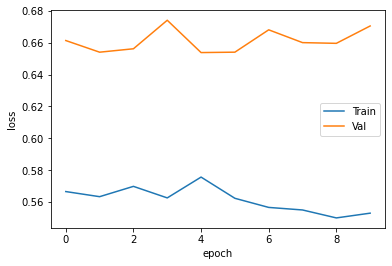

In [11]:
# 학습셋과 검증셋의 손실값 시각화 비교
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

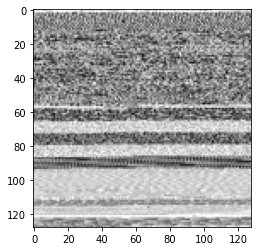

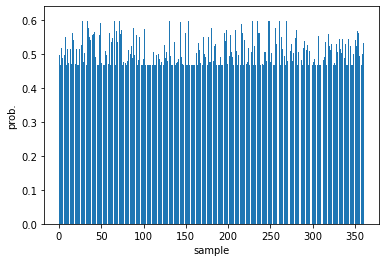

In [12]:
# 이미지로 출력해보기
plt.imshow(test_input[0].reshape(height,weight), cmap='gray_r') # 기존 데이터는 합성곱 연산을 위해 임의적으로 3차원을 만들었으나, 원래 데이터는 흑백이므로 색상데이터가 필요없어 2차원 데이터로 변환
plt.show()

# 이미지에 대한 예측 확인하기
test_predicted = model.predict(test_input) # Keras의 fit()/predict()/evaluate()는 모두 입력의 첫번째 차원이 배치 차원일 것으로 기대함. 따라서 결과 값은 (1, 28, 28, 1)과 같이 더 추가됨. 따라서 슬라이싱을 통해 원소 접근해야 함.

# Bar로 클래스 구분짓기
x = [i for i in range(1,len(test_predicted)+1)]
y = test_predicted.ravel()

plt.bar(x,y)
plt.xlabel('sample')
plt.ylabel('prob.')
plt.show()

In [7]:
# 데이터 검증을 위한 코드들
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve

'''
# Confusion Matrix 그리기
label = ['normal','malware']
cm = confusion_matrix(test_target, test_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot()
plt.show()
'''

# 정밀도
p = precision_score(test_target, test_predicted)
print(p)
# 재현율
r = recall_score(test_target, test_predicted)
print(r)
# F1 점수
f1 = f1_score(test_target, test_predicted)
print(f1)
#fpr, tpr, thresholds = roc_curve(test_target, model.predict_proba(test_predicted)[:, 1])
#print(fpr,tpr,thresholds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets